In [82]:
import gym, autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [101]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def policy(w, state):
    return np.argmax(policyfun(w, state))

def policyfun(w, state):
    """
    w is SxA matrix
    """
    state = state.reshape(-1, 1)
    y = np.matmul(w, state)
    return softmax(y)

def Q(w, state, action):
    """
    w is SxA matrix
    """
    return np.matmul(w, state)[action]

def log_prob(w, state, action):
    return np.log(policyfun(w, state)[action])

grad_p = autograd.grad(log_prob)
grad_v = autograd.grad(Q)

In [105]:
w_p = np.random.randn(4,8) * 0.1
w_v = np.zeros((4,8))

episode = 1000
discount = 0.9
alpha = 0.2
beta = 0.2

env = gym.make('LunarLander-v2')
state = env.reset()

episode_rewards = []
for e in range(episode):
    state = env.reset()
    I = 1
    rewards = []
    while True:
        action = policy(w_p, state)
        next_state, reward, done, _ = env.step(action)
        next_action = policy(w_p, next_state)
        td_error = reward + discount*Q(w_v, next_state, next_action) - Q(w_v, state, action)
        w_p += beta*grad_p(w_p, state, action)*Q(w_v, state, action)
        w_v += alpha*td_error*grad_v(w_v, state, action)
        state = next_state
        rewards.append(reward)
        if done:
            break
    episode_rewards.append(np.sum(rewards))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


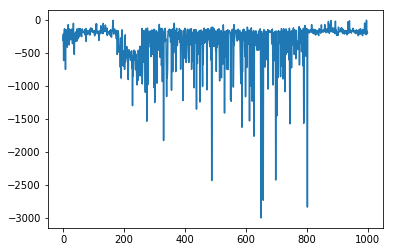

In [106]:
plt.plot(episode_rewards)

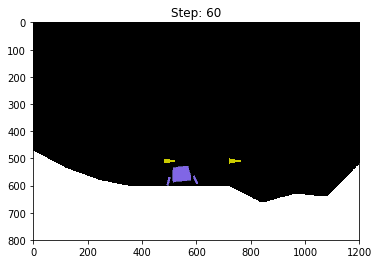

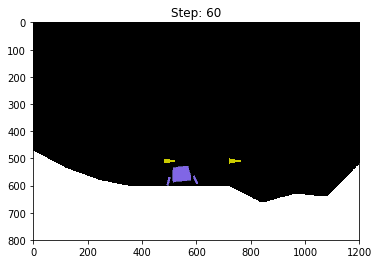

In [107]:
def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Step: %d" % (step))
    
    plt.pause(0.001)  # pause for plots to update
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
done = False
state = env.reset()
step = 0
while not done:
    step += 1
    show_state(env, step)
    action = policy(w_p, state)
    state, _, done, _ = env.step(action)